In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("GlobalLandTemperaturesByState.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [3]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [4]:
df.shape

(645675, 5)

In [5]:
df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [6]:
df = df.dropna(how='any', axis=0)

In [7]:
df.shape

(620027, 5)

In [8]:
df.rename(columns={'dt':'Date', 'AverageTemperature':'avg_temp', 'AverageTemperatureUncertainty':'confidence_interval_time'}, 
          inplace=True)

In [9]:
df.head()

,Date,avg_temp,confidence_interval_time,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [10]:
df['Date'] = pd.to_datetime(df['Date']) # year-month-day
df.set_index('Date', inplace = True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=620027, freq=None)

In [11]:
df.describe()

,avg_temp,confidence_interval_time
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [12]:
df['Year'] = df.index.year # type: ignore
df.head()

,avg_temp,confidence_interval_time,State,Country,Year
Date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [13]:
df.describe()

,avg_temp,confidence_interval_time,Year
count,620027.000000,620027.000000,620027.000000
mean,8.993111,1.287647,1902.331598
std,13.772150,1.360392,67.831393
min,-45.389000,0.036000,1743.000000
25%,-0.693000,0.316000,1851.000000
50%,11.199000,0.656000,1906.000000
75%,19.899000,1.850000,1960.000000
max,36.339000,12.646000,2013.000000


In [14]:
latest_df = df.loc['1975':'2013']
latest_df.head()
# print(latest_df)

,avg_temp,confidence_interval_time,State,Country,Year
Date,,,,,
1975-01-01,25.632,0.318,Acre,Brazil,1975
1975-02-01,25.811,0.663,Acre,Brazil,1975
1975-03-01,26.057,0.593,Acre,Brazil,1975
1975-04-01,26.084,0.442,Acre,Brazil,1975
1975-05-01,25.444,0.564,Acre,Brazil,1975


In [15]:
latest_df[['Country', 'avg_temp']].groupby(['Country']).mean().sort_values('avg_temp') # type: ignore

,avg_temp
Country,
Canada,-0.766551
Russia,2.321697
United States,11.420462
China,12.102396
Australia,18.392478
India,22.831829
Brazil,24.466980


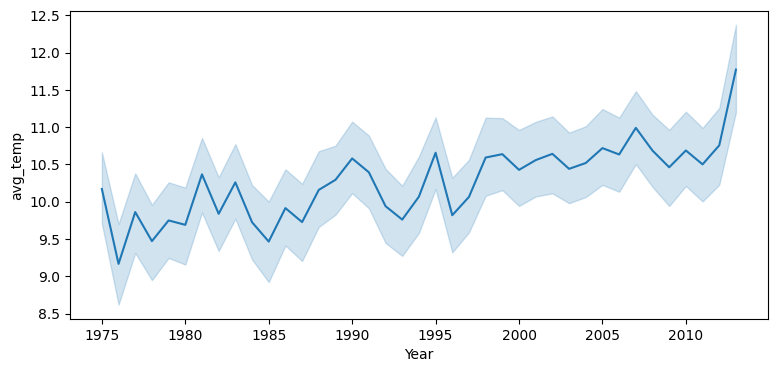

In [16]:
plt.figure(figsize=(9,4))
sns.lineplot(x="Year", y="avg_temp", data=latest_df)
plt.show()

In [17]:
resample_df = latest_df[['avg_temp']].resample('A').mean()

In [18]:
resample_df.head()
print(resample_df)

             avg_temp
Date                 
1975-12-31  10.170493
1976-12-31   9.166575
1977-12-31   9.860850
1978-12-31   9.471348
1979-12-31   9.748666
1980-12-31   9.689856
1981-12-31  10.366578
1982-12-31   9.837958
1983-12-31  10.259516
1984-12-31   9.724950
1985-12-31   9.465436
1986-12-31   9.914519
1987-12-31   9.726528
1988-12-31  10.158058
1989-12-31  10.293226
1990-12-31  10.579912
1991-12-31  10.394824
1992-12-31   9.940195
1993-12-31   9.760204
1994-12-31  10.067471
1995-12-31  10.656668
1996-12-31   9.818723
1997-12-31  10.064026
1998-12-31  10.592179
1999-12-31  10.637408
2000-12-31  10.426971
2001-12-31  10.557589
2002-12-31  10.641713
2003-12-31  10.440567
2004-12-31  10.518699
2005-12-31  10.718543
2006-12-31  10.633299
2007-12-31  10.989940
2008-12-31  10.685179
2009-12-31  10.461537
2010-12-31  10.686661
2011-12-31  10.500732
2012-12-31  10.755588
2013-12-31  11.771115


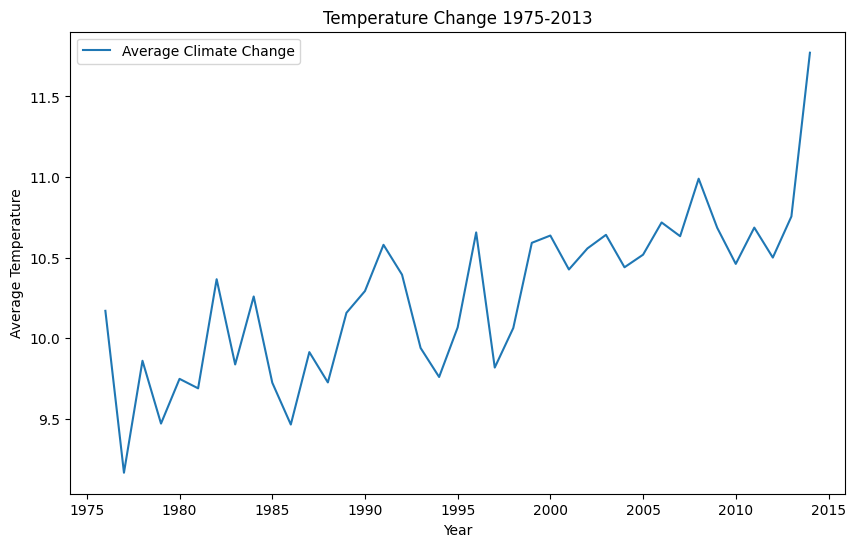

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(resample_df.index, resample_df['avg_temp'], label='Average Climate Change')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Temperature Change 1975-2013')
plt.legend()
plt.show()

In [20]:
print("Dickey-Fuller Test Results")

test_df = adfuller(resample_df.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(test_df[0:4], index=['Test Statistics', 'p-value', 'Lags Used', 'Number of Observations'])

for key,value in test_df[4].items(): # type: ignore
    df_output['Critical Value (%s)'%key] = value

print(df_output)

Dickey-Fuller Test Results
Test Statistics           -2.036226
p-value                    0.270919
Lags Used                  0.000000
Number of Observations    38.000000
Critical Value (1%)       -3.615509
Critical Value (5%)       -2.941262
Critical Value (10%)      -2.609200
dtype: float64


In [21]:
decomp = seasonal_decompose(resample_df, period=3)
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

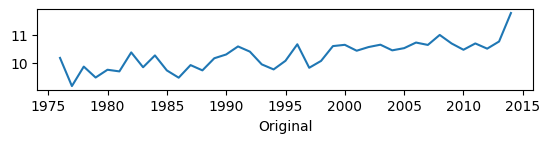

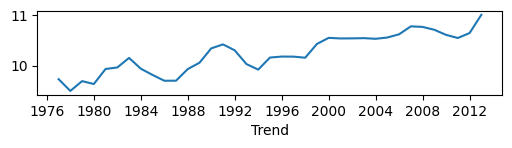

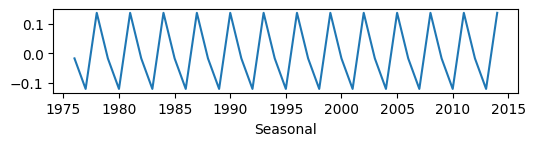

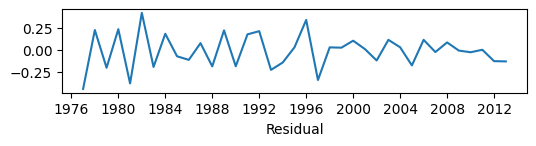

<Figure size 600x500 with 0 Axes>

In [22]:
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize=(6,5))

plt.tight_layout()

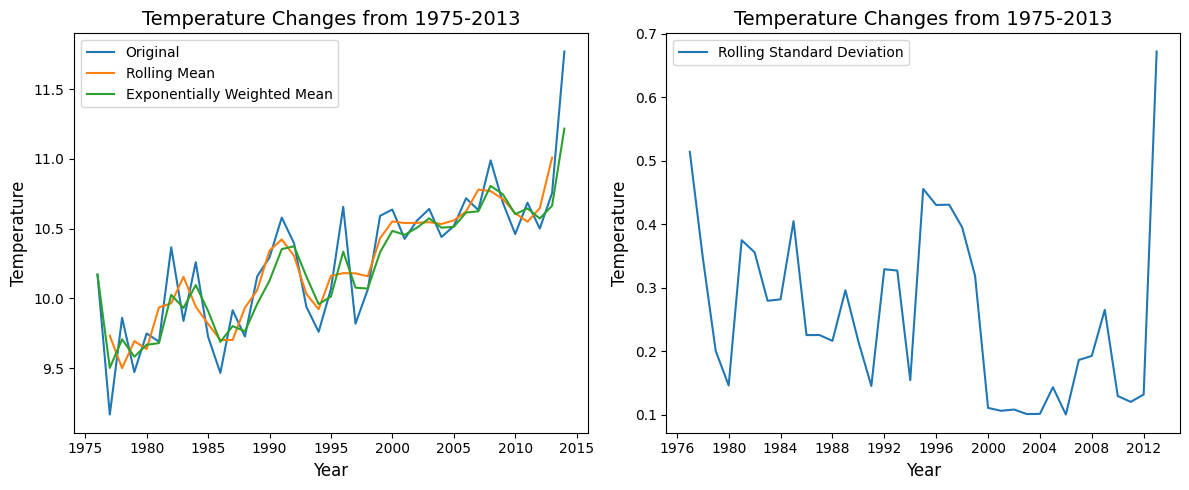

In [23]:
rol_mean = resample_df.rolling(window=3, center = True).mean()
ewm = resample_df.ewm(span=3).mean()
rol_std = resample_df.rolling(window=3, center=True).std()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(resample_df, label="Original")
ax1.plot(rol_mean, label = "Rolling Mean")
ax1.plot(ewm, label = "Exponentially Weighted Mean")
ax1.set_title('Temperature Changes from 1975-2013', fontsize=14)
ax1.set_ylabel("Temperature", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.legend()

ax2.plot(rol_std, label = "Rolling Standard Deviation")
ax2.set_title('Temperature Changes from 1975-2013', fontsize=14)
ax2.set_ylabel("Temperature", fontsize=12)
ax2.set_xlabel("Year", fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In [24]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)

print("Dickey-Fuller Test for Rolling Mean")
df_test = adfuller(rol_mean.iloc[:,0].values, autolag="AIC")
df_output = pd.Series(df_test[0:4], index=["Test Statistics", "P-value", "Lags Used", "Number of Observations"])

for key,value in df_test[4].items():    # type: ignore
    df_output["Critical Value (%s)"%key] = value

print(df_output)

print("")
print("------------------------------------")
print("")

print("Dickey-Fuller Test for Rolling Mean")
df_test = adfuller(ewm.iloc[:,0].values, autolag="AIC")
df_output = pd.Series(df_test[0:4], index=["Test Statistics", "P-value", "Lags Used", "Number of Observations"])

for key,value in df_test[4].items():    # type: ignore
    df_output["Critical Value (%s)"%key] = value

print(df_output)

Dickey-Fuller Test for Rolling Mean
Test Statistics            0.598748
P-value                    0.987585
Lags Used                  8.000000
Number of Observations    28.000000
Critical Value (1%)       -3.688926
Critical Value (5%)       -2.971989
Critical Value (10%)      -2.625296
dtype: float64

------------------------------------

Dickey-Fuller Test for Rolling Mean
Test Statistics           -0.638129
P-value                    0.862132
Lags Used                  0.000000
Number of Observations    38.000000
Critical Value (1%)       -3.615509
Critical Value (5%)       -2.941262
Critical Value (10%)      -2.609200
dtype: float64


In [25]:
diff_rol_mean = resample_df - rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,avg_temp
Date,
1976-12-31,-0.566065
1977-12-31,0.361259
1978-12-31,-0.222274
1979-12-31,0.112043
1980-12-31,-0.245178


In [26]:
diff_ewm = resample_df - ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

,avg_temp
Date,
1975-12-31,0.000000
1976-12-31,-0.334639
1977-12-31,0.154130
1978-12-31,-0.109841
1979-12-31,0.081038


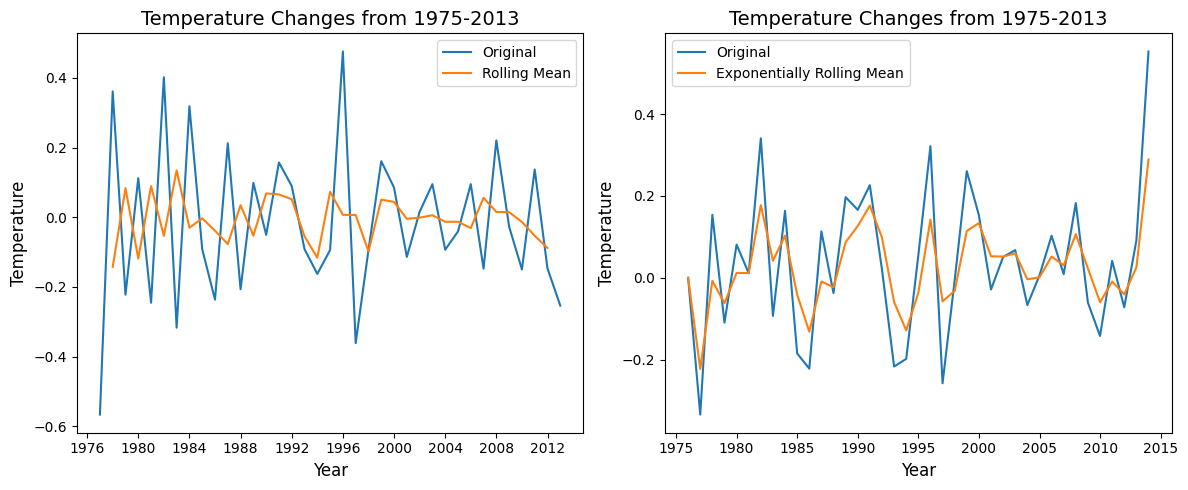

In [27]:
df_rol_mean_diff = diff_rol_mean.rolling(window=3, center = True).mean()
df_ewm_diff = diff_ewm.ewm(span=3).mean()
rol_std = resample_df.rolling(window=3, center=True).std()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(diff_rol_mean, label="Original")
ax1.plot(df_rol_mean_diff, label = "Rolling Mean")
ax1.set_title('Temperature Changes from 1975-2013', fontsize=14)
ax1.set_ylabel("Temperature", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.legend()

ax2.plot(diff_ewm, label = "Original")
ax2.plot(df_ewm_diff, label = "Exponentially Rolling Mean")
ax2.set_title('Temperature Changes from 1975-2013', fontsize=14)
ax2.set_ylabel("Temperature", fontsize=12)
ax2.set_xlabel("Year", fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In [28]:
print("Dickey-Fuller Test for Difference Between Original and Rolling Mean")
df_test = adfuller(diff_rol_mean.iloc[:,0].values, autolag="AIC")
df_output = pd.Series(df_test[0:4], index=["Test Statistics", "P-value", "Lags Used", "Number of Observations"])

for key,value in df_test[4].items():    # type: ignore
    df_output["Critical Value (%s)"%key] = value

print(df_output)

print("")
print("------------------------------------")
print("")

print("Dickey-Fuller Test for Difference Between Original and Exponentially Weighted Mean")
df_test = adfuller(diff_ewm.iloc[:,0].values, autolag="AIC")
df_output = pd.Series(df_test[0:4], index=["Test Statistics", "P-value", "Lags Used", "Number of Observations"])

for key,value in df_test[4].items():    # type: ignore
    df_output["Critical Value (%s)"%key] = value

print(df_output)

Dickey-Fuller Test for Difference Between Original and Rolling Mean
Test Statistics           -4.545457
P-value                    0.000163
Lags Used                  7.000000
Number of Observations    29.000000
Critical Value (1%)       -3.679060
Critical Value (5%)       -2.967882
Critical Value (10%)      -2.623158
dtype: float64

------------------------------------

Dickey-Fuller Test for Difference Between Original and Exponentially Weighted Mean
Test Statistics           -4.634648
P-value                    0.000111
Lags Used                  5.000000
Number of Observations    33.000000
Critical Value (1%)       -3.646135
Critical Value (5%)       -2.954127
Critical Value (10%)      -2.615968
dtype: float64


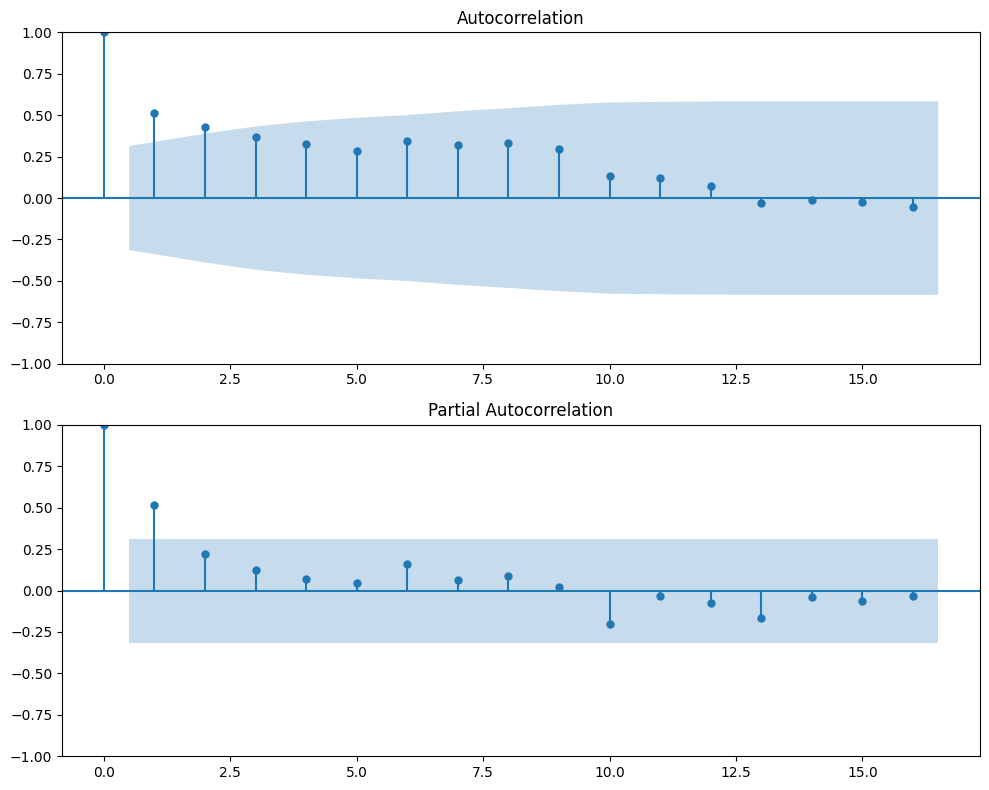

In [29]:
pyplot.figure(figsize=(10, 8))

# Subplot for ACF
pyplot.subplot(211)
plot_acf(resample_df, ax=pyplot.gca())

# Subplot for PACF
pyplot.subplot(212)
plot_pacf(resample_df, ax=pyplot.gca())

pyplot.tight_layout()
pyplot.show()

In [30]:
#Example to explain ACF and PACF

# Day 1: 10°C
# Day 2: 12°C
# Day 3: 14°C
# Day 4: 16°C
# Day 5: 18°C
# Day 6: 20°C
# Day 7: 22°C